# Ejercicio 39
Una turbina adiabática recibe 10 kg/s de vapor a 30 bar y 320°C. El vapor egresa a 0,14 bar siendo el rendimiento isoentrópico de 75%. Se pide:
1. Potencia
2. $\Delta S_u$
3. Trabajo perdido

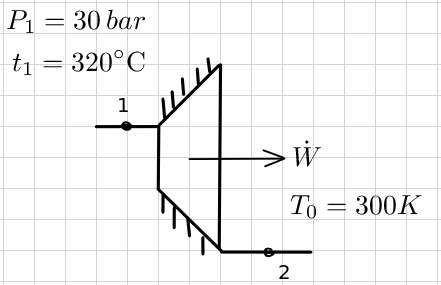

## Solución

In [ ]:
# Datos:
P_1 = 30e5 # [Pa]
P_2 = 0.14e5 # [Pa]
T_1 = 320 + 273.15 # [K]
T_0 = 300 # [K]
m = 10 # [kg/s]
n_iso = 0.75

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 12.8 MB/s 


In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI('S','P',P_1,'T',T_1,'Water')
fase_1 = cp.PhaseSI('P',P_1,'T',T_1,'Water')

In [ ]:
#@title
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))
print('s_1 = %.5f [kJ/(kg·K)] -'%(s_1/1000),fase_1)

h_1 = 3044.15 [kJ/kg]
s_1 = 6.62664 [kJ/(kg·K)] - gas


Luego $s_{2rev} = s_1$

In [ ]:
s_2rev = s_1
cp.PhaseSI('P',P_2,'S',s_2rev,'Water')

'twophase'

In [ ]:
sp1 = cp.PropsSI('S','P',P_2,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P_2,'Q',1,'Water')

$$ x_{2rev} = \frac{ s_{2rev} - s' }{ s'' - s' } $$

In [ ]:
x_2rev = (s_2rev - sp1)/(sp2 - sp1)

In [ ]:
#@title 
print('x_2rev = %.4f'%x_2rev)

x_2rev = 0.8075


In [ ]:
# también directamente x_2rev
cp.PropsSI('Q','P',P_2,'S',s_2rev,'Water')

0.8074610978872369

$$ h_{2rev} = x_{2rev} (h'' - h') + h' $$

In [ ]:
hp1 = cp.PropsSI('H','P',P_2,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_2,'Q',1,'Water')

In [ ]:
h_2rev = x_2rev*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h_2rev = %.2f [kJ/kg]'%(h_2rev/1000))

h_2rev = 2138.35 [kJ/kg]


In [ ]:
# o tambien h_2rev
cp.PropsSI('H','P',P_2,'Q',x_2rev,'Water')/1000

2138.349720340493

Rendimiento isoentrópico

$$ \eta_{iso(s)} = \frac{ \dot{W}_{real} }{ \dot{W}_{rev} } = \frac{h_1 - h_{2real} }{ h_1 - h_{2rev} } = 0,75 $$

Trabajo reversible

$$ \dot{W}_{rev} = m \, (h_1 - h_{2rev} ) $$

Trabajo real

$$ \dot{W}_{real} = \eta_{iso} \dot{W}_{rev} $$

In [ ]:
W_rev = m*(h_1 - h_2rev)
W_real = n_iso*W_rev

Trabajo real

$$ \dot{W}_{real} = m \, (h_1 - h_{2real}) $$

Entalpía en 2, real

$$ h_{2real} = h_1 - \frac{\dot{W}_{real}}{m} $$

In [ ]:
h_2real = h_1 - W_real/m

In [ ]:
#@title
print('h_2real = %.2f [kJ/kg]'%(h_2real/1000))

h_2real = 2364.80 [kJ/kg]


Estado del vapor en 2, real

$$ x_{2real} = \frac{h_{2real} - h'}{h'' - h'} $$

In [ ]:
x_2real = (h_2real - hp1)/(hp2 - hp1)

In [ ]:
#@title 
print('x_2real = %.4f'%x_2real)

x_2real = 0.9028


Entropía en 2, real

$$ s_{2real} = x_{2real} (s'' - s') + s' $$

In [ ]:
sp1 = cp.PropsSI('S','P',P_2,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P_2,'Q',1,'Water')

In [ ]:
s_2real = x_2real*(sp2 - sp1) + sp1

In [ ]:
#@title
print('s_2real = %.5f [kJ/(kg·K)]'%(s_2real/1000))

s_2real = 7.32192 [kJ/(kg·K)]


Variación de entropía del Universo

$$ \Delta S_u = \underbrace{\Delta S_m}_{\equiv \, 0}  + \Delta S_s $$

$\Delta S_m \, \rightarrow \, 0$, porque la turbina es adiabática.

$$ \Delta S_u = m \, (s_{2real} - s_1) $$

In [ ]:
DSu = m*(s_2real - s_1)

In [ ]:
#@title
print('DSu = %.4f [kJ/(K·s)]'%(DSu/1000))

DSu = 6.9528 [kJ/(K·s)]


Trabajo perdido

$$ \dot{W}_{perd} = T_0 \, \Delta S_u $$

In [ ]:
W_perd = T_0*DSu

In [ ]:
#@title
print('W_perd = %.2f [kW]'%(W_perd/1000))

W_perd = 2085.84 [kW]


In [ ]:
#@title
print('Resumen de resultados:')
print('1) Potencia: W_real = %.2f [kW]'%(W_real/1000))
print('2) Variación de entropía del universo: DSu = %.4f [kJ/(K·s)]'%(DSu/1000))
print('3) Trabajo perdido: W_perd = %.2f [kW]'%(W_perd/1000))

Resumen de resultados:
1) Potencia: W_real = 6793.51 [kW]
2) Variación de entropía del universo: DSu = 6.9528 [kJ/(K·s)]
3) Trabajo perdido: W_perd = 2085.84 [kW]
